In [1]:
import os
import pandas 
import numpy
import json
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Grid Search
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV

# Extra Tree Classifer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

# one-hot encoding
from sklearn.preprocessing import LabelBinarizer

# grdient booting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# To ignore warnings
import warnings  

In [2]:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [3]:
# importing supporting files
from ipynb.fs.full.FeatureEngineering import *
from ipynb.fs.full.GenerateOutput import *
from ipynb.fs.full.Models import *
from ipynb.fs.full.Metrics import *

In [4]:
# setting seed value
np.random.seed(19)

## Importing Data

In [5]:
maindir = "/Users/apoorvamalemath/Documents/MS/SML/Project/BloodSpectrocopy/"
maindir= maindir+ "Final_Files/NewData" 
traincsv = maindir+"/Updated_Train.csv"
testcsv = maindir+"/Updated_Test.csv"
trainTrimmedcsv = maindir+"/Updated_Train_Trimmed.csv"
testTrimmedcsv= maindir+"/Updated_Test_trimmed.csv"
submissioncsv=maindir+"/Updated_Sample_Submission.csv"

In [6]:
# Importing and viewing the train data
train = pd.read_csv(traincsv)
train.head()

,Reading_ID,donation_id,id,std,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_DHOO9QI5,ID_2250,0,0.0026,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,...,1.310330,1.353629,1.336609,1.319344,1.278294,39.27,44.17,low,ok,high
1,ID_14AIYD93,ID_2250,1,0.0026,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,...,1.286939,1.301804,1.314457,1.282723,1.267465,39.39,44.09,low,ok,high
2,ID_174KKMK2,ID_2250,2,0.0026,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,...,1.310330,1.311108,1.283048,1.287730,1.266464,39.50,44.00,low,ok,high
3,ID_YQ1P54R0,ID_2250,3,0.0026,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,...,1.306762,1.297632,1.314811,1.314408,1.342224,39.60,43.89,low,ok,high
4,ID_019XYV5P,ID_2250,4,0.0026,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,...,1.285386,1.295650,1.290355,1.268710,1.216146,39.70,43.83,low,ok,high


In [7]:
# size of train data
train.shape

(13080, 179)

In [8]:
# Importing and viewing the train trimmed data
trainTrimmed = pd.read_csv(trainTrimmedcsv)
trainTrimmed.head()

,Reading_ID,donation_id,id,std,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,...,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_DHOO9QI5,ID_2250,0,0.0026,0.612949,0.617855,0.621710,0.622049,0.623373,0.620610,...,1.323804,1.331071,1.332295,1.328928,1.309800,39.27,44.17,low,ok,high
1,ID_14AIYD93,ID_2250,1,0.0026,0.619217,0.625162,0.627111,0.629326,0.628116,0.627815,...,1.332883,1.324965,1.339512,1.336343,1.322957,39.39,44.09,low,ok,high
2,ID_174KKMK2,ID_2250,2,0.0026,0.617558,0.624398,0.626222,0.627771,0.626445,0.623953,...,1.341004,1.335655,1.333660,1.325491,1.335868,39.50,44.00,low,ok,high
3,ID_YQ1P54R0,ID_2250,3,0.0026,0.616252,0.622437,0.625715,0.626799,0.625676,0.625084,...,1.340746,1.345123,1.332574,1.345660,1.349603,39.60,43.89,low,ok,high
4,ID_019XYV5P,ID_2250,4,0.0026,0.617109,0.624688,0.626810,0.628163,0.627580,0.625115,...,1.342041,1.332869,1.324404,1.316186,1.329893,39.70,43.83,low,ok,high


In [9]:
# size of train data
train.shape

(13080, 179)

In [10]:
# Loading Test Data
test = pd.read_csv(testcsv)
test.head()

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,...,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity
0,ID_KWUAQLRM,ID_2982,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,...,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,0,0.0027,37.09,27.22
1,ID_FN8SIVJJ,ID_2982,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,...,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,1,0.0027,37.20,27.17
2,ID_CI4TQCHI,ID_2982,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,...,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,2,0.0027,37.30,27.07
3,ID_URJMKNU7,ID_2982,0.525008,0.527439,0.536871,0.539636,0.546555,0.553183,0.558826,0.563549,...,1.218532,1.185708,1.196750,1.222484,1.177406,1.198399,3,0.0027,37.38,26.98
4,ID_HBJH67IS,ID_2982,0.520532,0.522683,0.526842,0.534634,0.539676,0.547488,0.552688,0.558355,...,1.206383,1.204950,1.203311,1.191351,1.157577,1.212008,4,0.0027,37.48,26.89


In [11]:
# Loading Test trimmed Data
testTrimmed = pd.read_csv(testTrimmedcsv)
testTrimmed.head()

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,...,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,id,std,temperature,humidity
0,ID_KWUAQLRM,ID_2982,0.600692,0.605104,0.608611,0.608169,0.606985,0.606590,0.603814,0.600409,...,1.249615,1.244618,1.242537,1.238426,1.233983,1.235212,0,0.0027,37.09,27.22
1,ID_FN8SIVJJ,ID_2982,0.601620,0.605895,0.609568,0.610188,0.608635,0.607716,0.606237,0.601746,...,1.256831,1.246188,1.236320,1.242136,1.234657,1.233898,1,0.0027,37.20,27.17
2,ID_CI4TQCHI,ID_2982,0.601226,0.608085,0.611143,0.611085,0.608700,0.608647,0.605048,0.601668,...,1.253063,1.247183,1.245595,1.248910,1.239302,1.236558,2,0.0027,37.30,27.07
3,ID_URJMKNU7,ID_2982,0.606784,0.612443,0.615604,0.616249,0.615097,0.614963,0.611250,0.608559,...,1.257032,1.244043,1.246127,1.238651,1.236244,1.243770,3,0.0027,37.38,26.98
4,ID_HBJH67IS,ID_2982,0.602236,0.607339,0.611220,0.610289,0.609552,0.607212,0.605949,0.603972,...,1.258131,1.245495,1.242633,1.241607,1.243308,1.234993,4,0.0027,37.48,26.89


In [42]:
# Viewing the submission format
submission = pd.read_csv(submissioncsv)
submission.head()

,Donation_ID,target
0,ID_1961_cholesterol_ldl_human,ok
1,ID_1961_hdl_cholesterol_human,ok
2,ID_1961_hemoglobin(hgb)_human,ok
3,ID_2067_cholesterol_ldl_human,ok
4,ID_2067_hdl_cholesterol_human,ok


## Understanding and Visualising Data

#### -> Test Case 1: Checking for Null Values

In [13]:
# checking for null values in the train data
train.isnull().sum().sort_values()

Reading_ID               0
absorbance110            0
absorbance111            0
absorbance112            0
absorbance113            0
                        ..
absorbance58             0
absorbance59             0
absorbance60             0
absorbance40             0
cholesterol_ldl_human    0
Length: 179, dtype: int64

In [14]:
# checking for null values in the test data
train.isnull().sum().sort_values()

Reading_ID               0
absorbance110            0
absorbance111            0
absorbance112            0
absorbance113            0
                        ..
absorbance58             0
absorbance59             0
absorbance60             0
absorbance40             0
cholesterol_ldl_human    0
Length: 179, dtype: int64

#### -> Test Case 1 Conclusion: No Null Values to be treated

### Distribution of the response variables

#### -> Test Case 2: Checking Distribution of Data

<AxesSubplot:xlabel='hdl_cholesterol_human', ylabel='count'>

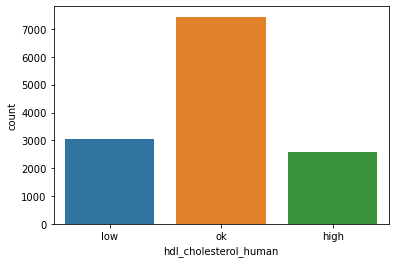

In [15]:
sns.countplot(train["hdl_cholesterol_human"])

<AxesSubplot:xlabel='hemoglobin(hgb)_human', ylabel='count'>

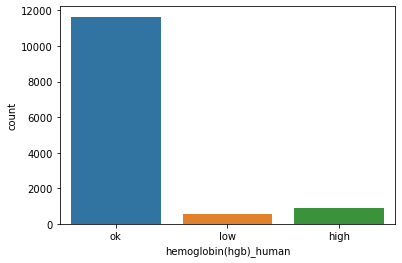

In [16]:
sns.countplot(train["hemoglobin(hgb)_human"])

<AxesSubplot:xlabel='cholesterol_ldl_human', ylabel='count'>

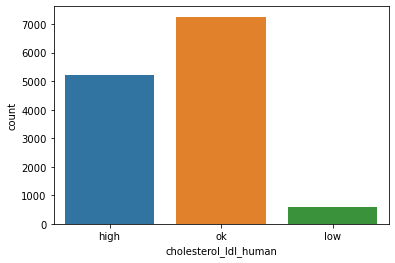

In [17]:
sns.countplot(train["cholesterol_ldl_human"])

#### -> Test Case 2 Conclusion: The Data is imbalanced

### Correlation heat map

#### -> Test Case 3: Checking the correlation of the features

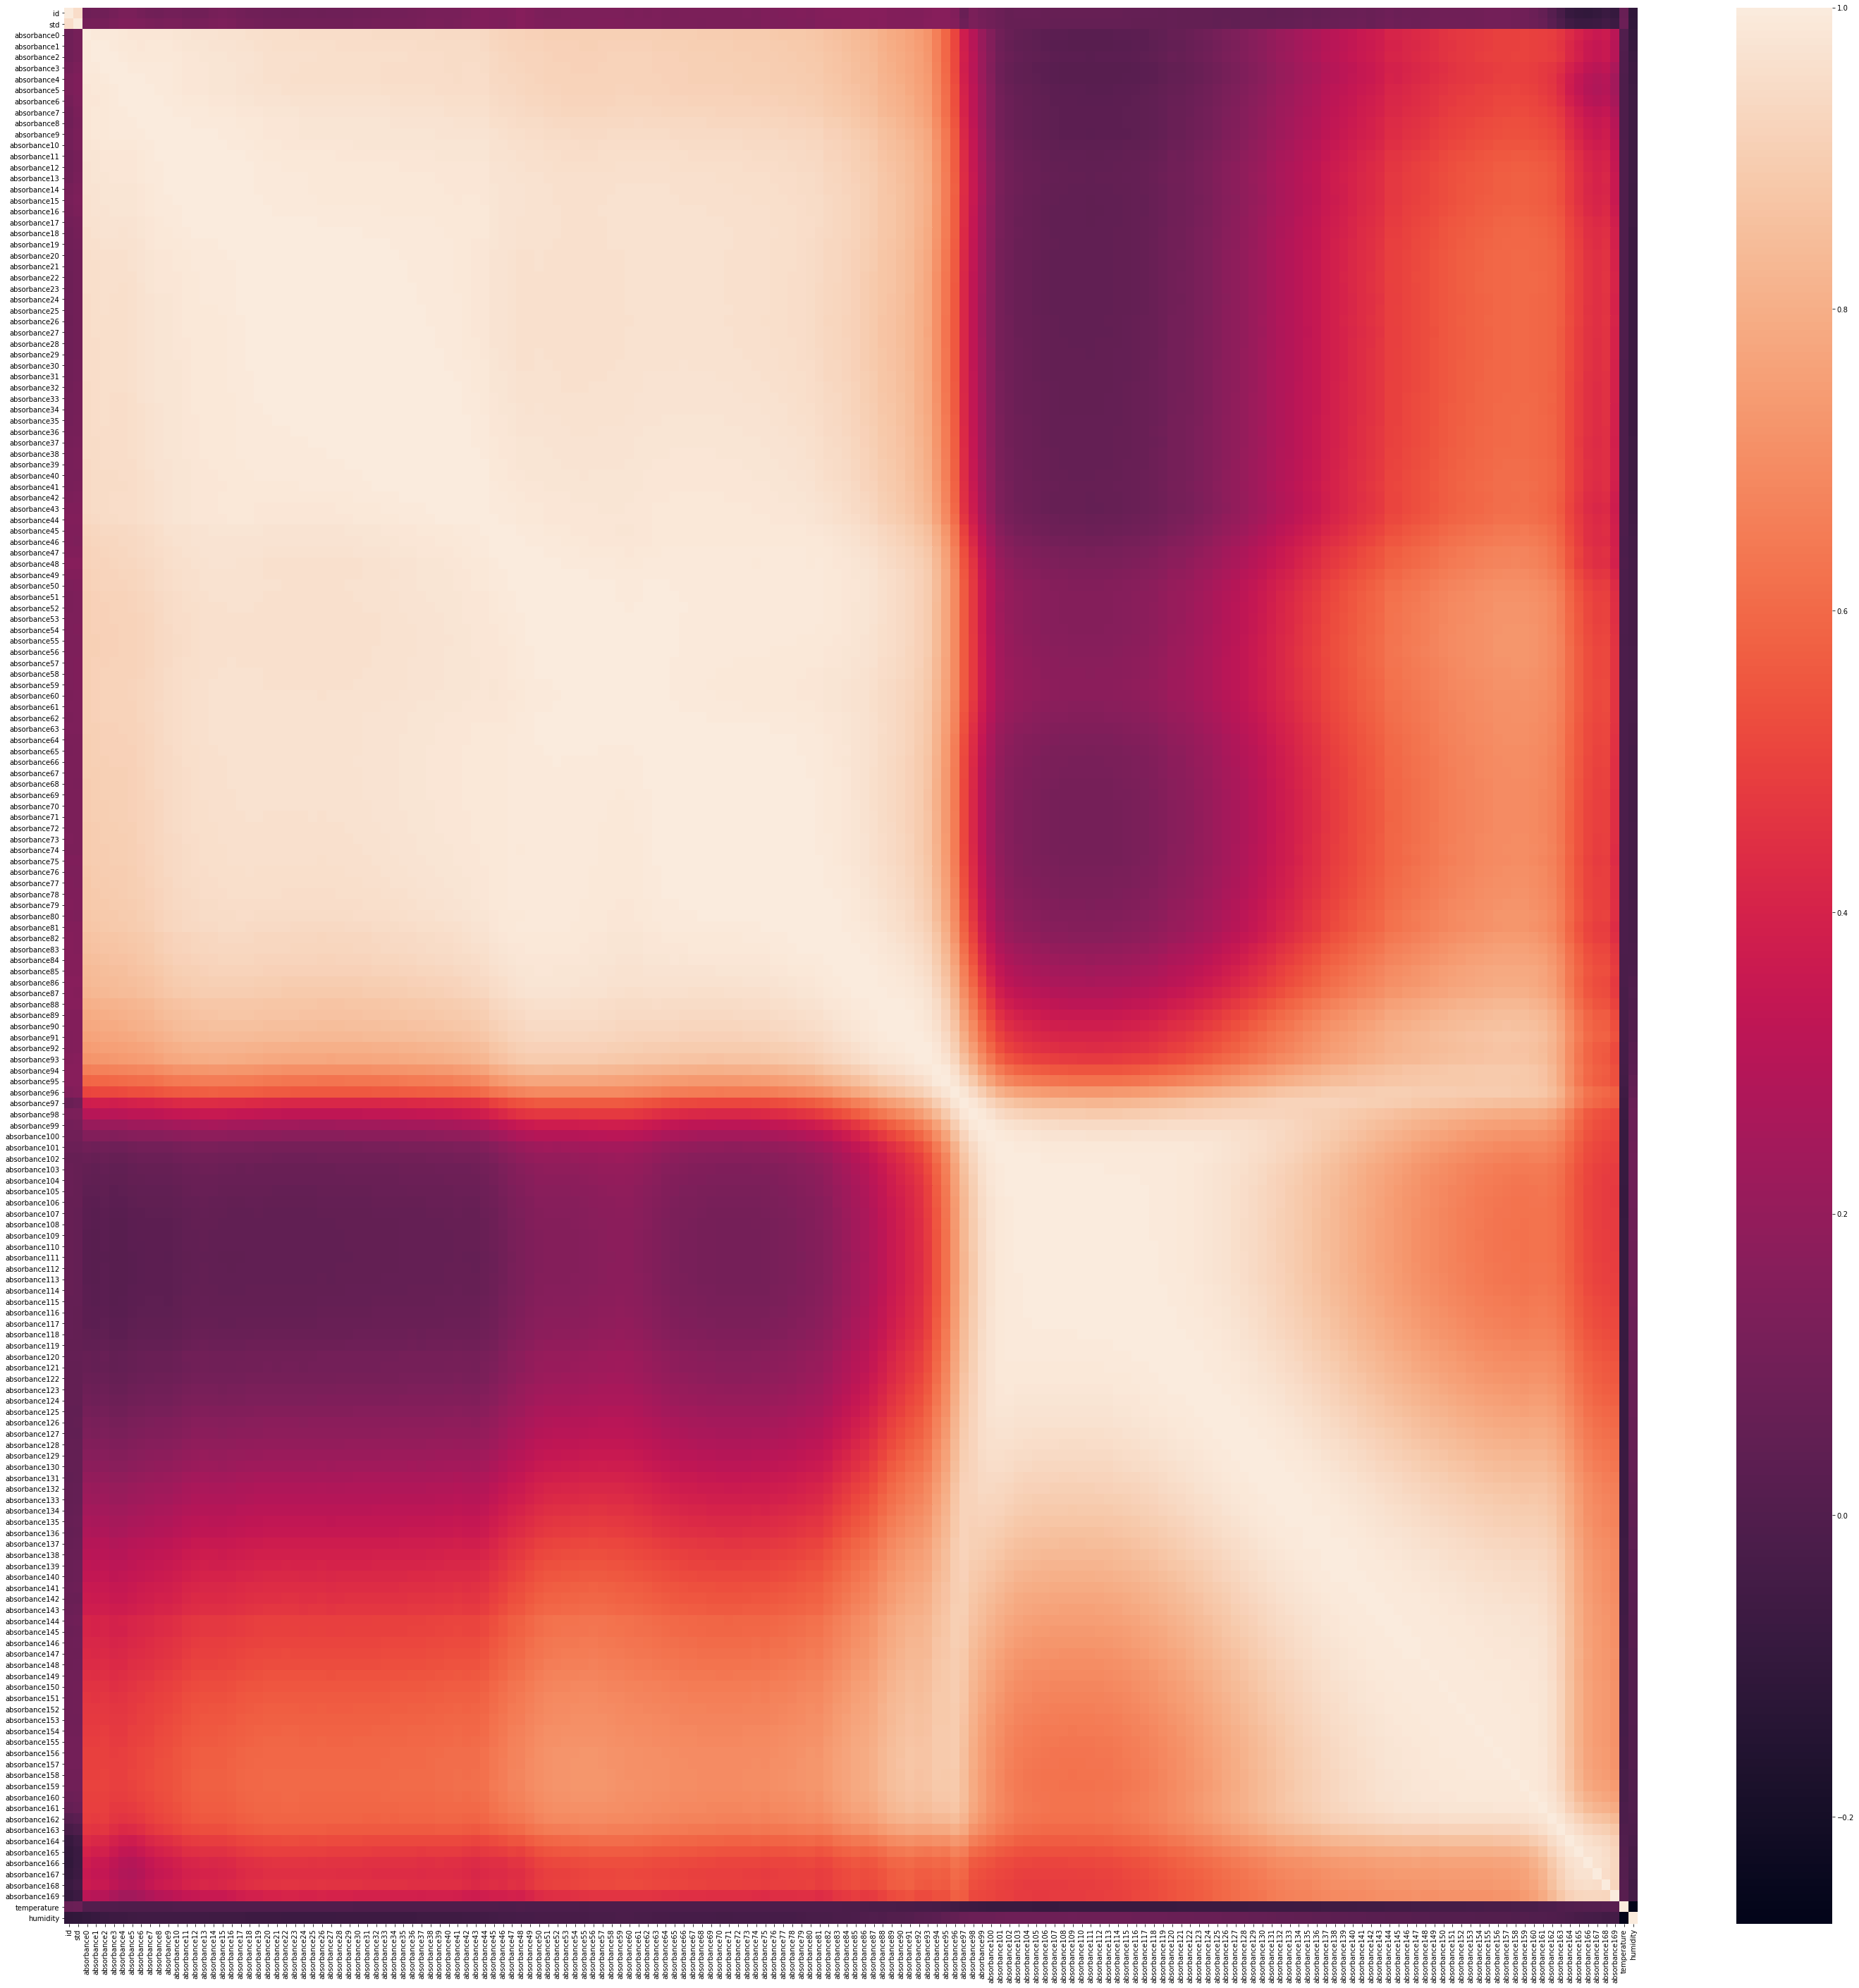

In [18]:
# viewing the correlation between features
fig, ax = plt.subplots(1,1,figsize = (50,50))
corr = train.iloc[:,:-3].corr()
sns.heatmap(corr)
fig.show()

#### -> Test Case 3 Conclusion: The features exhibit multicollinearity.

### Viewing the distribution of features

#### -> Test Case 4: Check the distribution of data

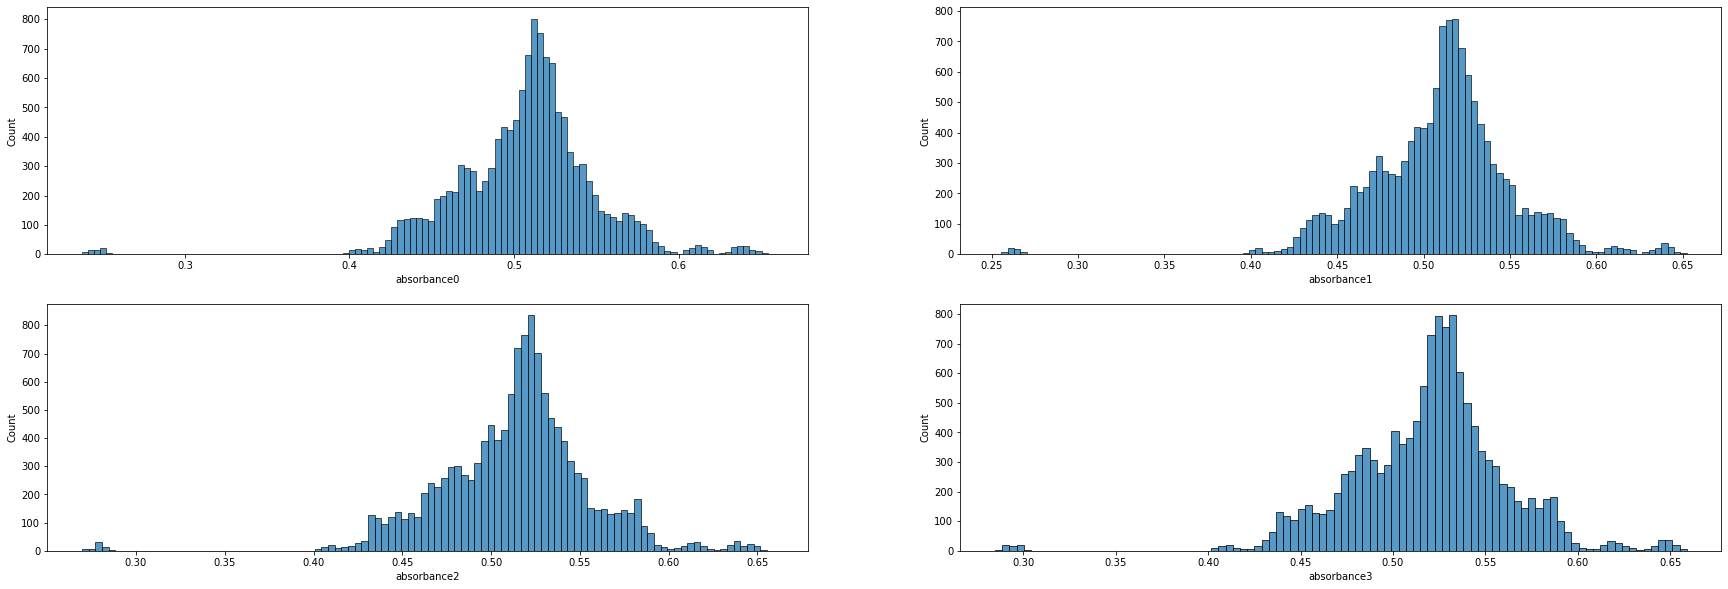

In [19]:
fig, ax = plt.subplots(2,2,figsize = (30,10))
sns.histplot(train, x = "absorbance0", ax = ax[0,0])
sns.histplot(train, x = "absorbance1", ax = ax[0,1])
sns.histplot(train, x = "absorbance2", ax = ax[1,0])
sns.histplot(train, x = "absorbance3", ax = ax[1,1])
fig.show()

#### -> Test Case 4 Conclusion: The features exhibit normal distribution.

# Feature Engineering

### Outlier Detection and Removal

#### -> Test Case 5: Outlier Detection 

In [20]:
print('The size of the data before removing outliers is ',train.shape)

The size of the data before removing outliers is  (13080, 179)


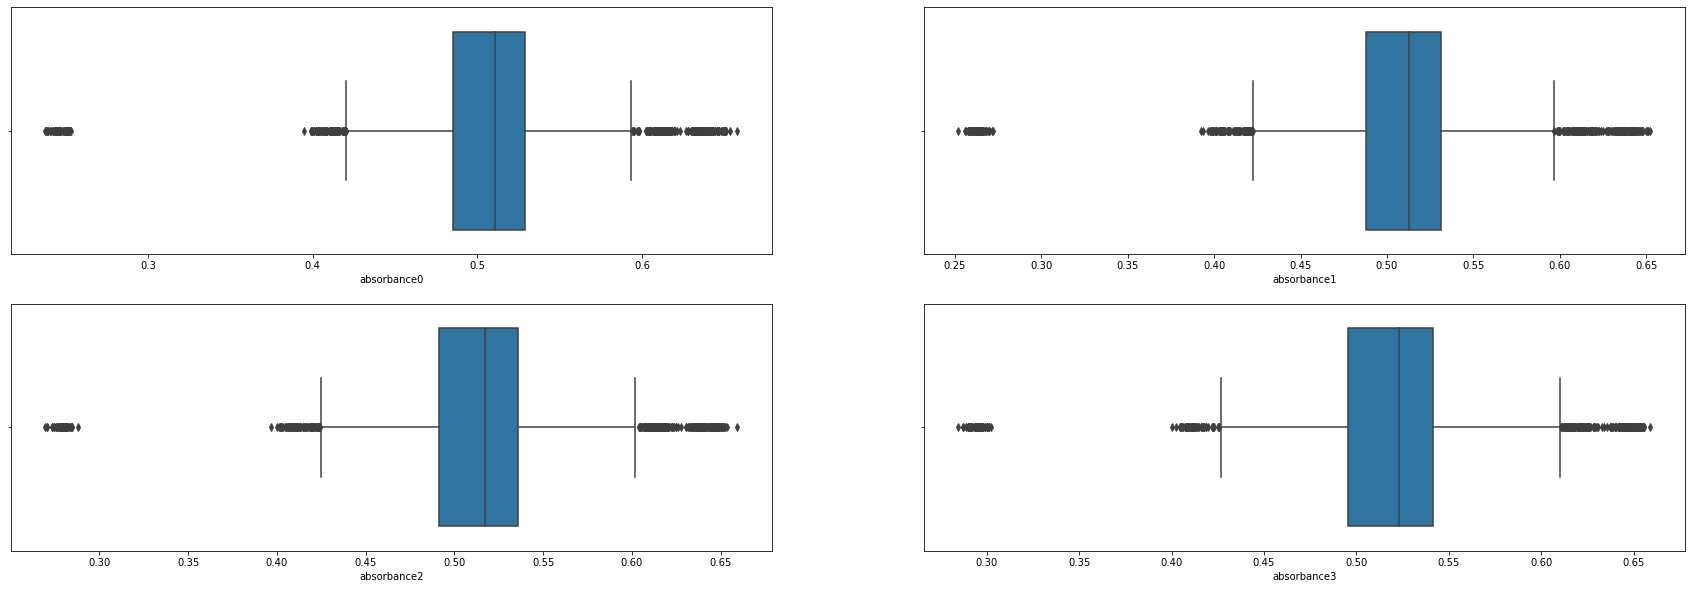

In [190]:
# Visualising the outliers
fig, ax = plt.subplots(2,2,figsize = (30,10))
sns.boxplot(train['absorbance0'], ax = ax[0,0])
sns.boxplot(train['absorbance1'], ax = ax[0,1])
sns.boxplot(train['absorbance2'], ax = ax[1,0])
sns.boxplot(train['absorbance3'], ax = ax[1,1])
fig.show()

In [12]:
# Removing Outliers based on specific features
train = removeOutliersCols(train,['std'])

In [25]:
# Removing Outliers for all the features
train = removeOutliers(train)

In [26]:
# Size of train data after removing the outliers
train.shape

(6626, 179)

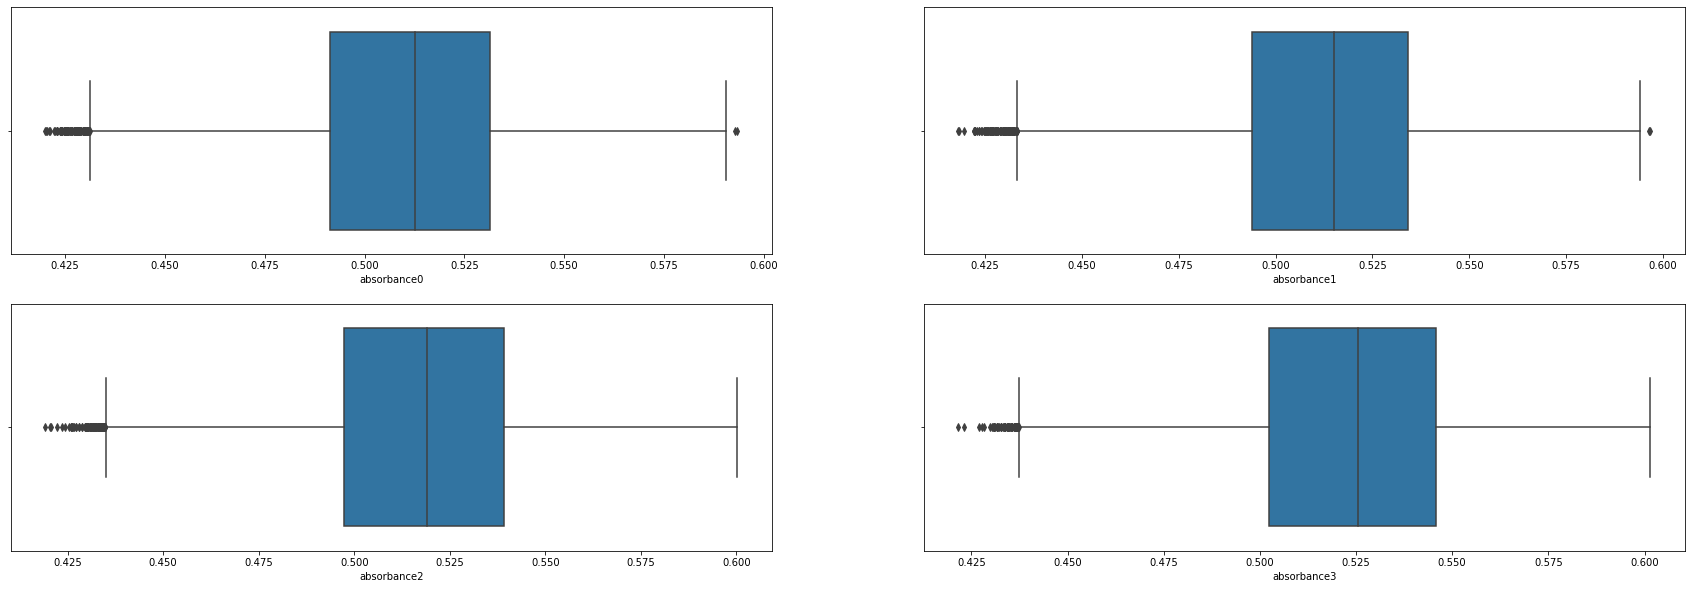

In [193]:
# Visualising features after removing outliers
fig, ax = plt.subplots(2,2,figsize = (30,10))
sns.boxplot(train['absorbance0'], ax = ax[0,0])
sns.boxplot(train['absorbance1'], ax = ax[0,1])
sns.boxplot(train['absorbance2'], ax = ax[1,0])
sns.boxplot(train['absorbance3'], ax = ax[1,1])
fig.show()

In [194]:
print('The size of the data after removing outliers is ',train.shape)

The size of the data after removing outliers is  (6626, 179)


#### -> Test Case 5 Conclusion: From the plots, we observe that we removed the outliers sucessfully. 

In [13]:
# Storing IDs for reference
test = pd.read_csv(testcsv)
idx = test.donation_id.values
idxReadingID = test.Reading_ID.values

index=0
new_col = test['std']  # can be a list, a Series, an array or a scalar   
test.insert(loc = index, column='std2', value=new_col)


# Dropping the ID column in the test data 
test.drop(["Reading_ID"], axis = 1, inplace = True)
test.drop(["donation_id"], axis = 1, inplace = True)
test.drop(["id"], axis = 1, inplace = True)
test.drop(["std"], axis = 1, inplace = True)

test = test.to_numpy()
print('The size of test data is ', test.shape) 

The size of test data is  (3660, 173)


### Creating Validation Data by taking 70% of the data for training, and 30% for validation

In [14]:
#Converting train dataframe to numpy type array
data = numpy.array(train)  

train ,validation = train_test_split(data,test_size = 0.3, shuffle = True)       
train = pd.DataFrame(train)
validation = pd.DataFrame(validation)

In [15]:
print('The size of the train data is ',train.shape)
print('The size of the validation data is ',validation.shape)
print('The size of the test data is ',test.shape)

The size of the train data is  (8694, 179)
The size of the validation data is  (3726, 179)
The size of the test data is  (3660, 173)


In [16]:
# Dropping ID column and converting the data to numpy array
train.drop([0], axis = 1, inplace = True)
train.drop([1], axis = 1, inplace = True)
train.drop([2], axis = 1, inplace = True)
data = train.to_numpy()
print('Shape of the train data is ', data.shape) 

Shape of the train data is  (8694, 176)


In [17]:
# Seperating features and labels for train data
features = np.array(data[:,:173], dtype = float)
labels = data[:, 173:]

In [18]:
features.shape

(8694, 173)

In [19]:
# Storing label y values in a DataFrame
validationLabels = validation.iloc[:,176:179] 

# Storing ID for reference
validationID = validation.iloc[:,0]
validationDonationID = validation.iloc[:,1]
validationID2 = validation.iloc[:,2]

In [20]:
# Dropping label values for validation data
validation = validation.drop(columns = [176,177,178])

# Dropping ID column for validation data and converting to an array
validation.drop([0], axis = 1, inplace = True)
validation.drop([1], axis = 1, inplace = True)
validation.drop([2], axis = 1, inplace = True)
validation = validation.to_numpy()
print('Size of the validation data is ', validation.shape)

Size of the validation data is  (3726, 173)


### Data Preperation

The goal of the project is to classify the level of cholesterol low, cholesterol high and hemoglobin. The prediction will be in the form ok, low and high. 

So we convert the categorical labels to numeric.

Key:
low  = 0,
ok   = 1,
high = 2

#### -> Test Case 6: Treating Categorical Variables

In [21]:
# Target columns in categorical format
print(labels)

[['low' 'ok' 'ok']
 ['ok' 'ok' 'ok']
 ['low' 'ok' 'high']
 ...
 ['low' 'ok' 'high']
 ['low' 'low' 'ok']
 ['ok' 'ok' 'high']]


In [22]:
# Convert the categorical labels to numeric for train data
labels_n = np.zeros(labels.shape)
labels_n[np.where(labels =='low')] = 0
labels_n[np.where(labels =='ok')] = 1
labels_n[np.where(labels =='high')] = 2

In [23]:
# Target columns after converting to numerical format
print(labels_n)

[[0. 1. 1.]
 [1. 1. 1.]
 [0. 1. 2.]
 ...
 [0. 1. 2.]
 [0. 0. 1.]
 [1. 1. 2.]]


#### -> Test Case 6 Conclusion: The categorical variables are mapped to low = 0, ok = 1, high = 2

In [24]:
# Convert the categorical labels to numeric for validation data
validationLabels_n = np.zeros(validationLabels.shape)
validationLabels_n[np.where(validationLabels == 'low')] = 0
validationLabels_n[np.where(validationLabels == 'ok')] = 1
validationLabels_n[np.where(validationLabels == 'high')] = 2

In [25]:
n_samples, n_features = features.shape
# 3 columns to predict 
n_outputs = labels_n.shape[1] 
# Each output column can have one of the 3 classes
n_classes = 3 

# MODELS

###  1)  Random Forest MultiOutputClassifier

In [209]:
predlabels, predlabelsv = RFMultiOutputClassifier(features, labels_n, 
                                        validation, validationLabels_n,test)

Validation Score:  0.9936289500509684


In [212]:
f1,pre,re = evaluateValidation(validationLabels_n,predlabelsv[:,0],0)
print('======== Metrics for HCH: ======== ')
print('F1-Score :', f1)
print('Precision :', pre)
print('Re-call :',re)

f1,pre,re = evaluateValidation(validationLabels_n,predlabelsv[:,1],1)
print('======== Metrics for HHH: ======== ')
print('F1-Score :', f1)
print('Precision :', pre)
print('Re-call :',re)

f1,pre,re = evaluateValidation(validationLabels_n,predlabelsv[:,2],2)
print('======== Metrics for CLH: ======== ')
print('F1-Score :', f1)
print('Precision :', pre)
print('Re-call :',re)

======== Metrics for HCH: ======== 
F1-Score : 0.9988713885308437
Precision : 0.9993936637865697
Re-call : 0.9983523876607426
======== Metrics for HHH: ======== 
F1-Score : 0.9898686215726431
Precision : 0.9988505747126437
Re-call : 0.981191389599318
======== Metrics for CLH: ======== 
F1-Score : 0.9973422322880006
Precision : 0.9980894147592316
Re-call : 0.9966009284137461


### 2) Applying Random Forest Classifier, Extra Tree Classifier and Logistic Regression on all the features

As we need to perform multiclass classification for 3 columns i.e. 

Hdl_cholesterol_human: The level of cholesterol high. Can be low, ok or high.

Cholesterol_ldl_human: The level of cholesterol low. Can be low, ok or high.

Hemoglobin(hgb)_human: The level of hemoglobin: Can be low, ok or high.

We perform feature extraction considering for each of these columns individually.

In [74]:
noFeatureL = [172]
noEst = 200

metrics = pd.DataFrame(columns = ['NoFeature','Model', 'Target', 'F1-Score',
                              'Precision','Re-call'])

for nofeature in noFeatureL:
    
    print("================ No of Features: ",nofeature,"================ ")
    print("Hdl_cholesterol_human:")
    
    # Applying Random Forest on Hdl_cholesterol_human
    pl_HCH_RF, pl_HCHv_RF = RandomForestClassifierEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RF, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Hdl_cholesterol_human
    pl_HCH_XT, pl_HCHv_XT = ExtraTreesClassifierEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_XT, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 

    # Applying Logistic Regression on Hdl_cholesterol_human
    pl_HCH_LR, pl_HCHv_LR = logisticRegressionEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_LR, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HCH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    print("Hemoglobin_hgb_human:")
    
    # Applying Random Forest on Hemoglobin_hgb_human
    pl_HHH_RF, pl_HHHv_RF = RandomForestClassifierEachTargetGS(features, 
                                    validation, test, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_RF, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Hemoglobin_hgb_human
    pl_HHH_XT, pl_HHHv_XT = RandomForestClassifierEachTargetGS(features, 
                                    validation, test, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re=evaluateValidation(validationLabels_n, pl_HHHv_XT, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Logistic Regression on Hemoglobin_hgb_human
    pl_HHH_LR, pl_HHHv_LR = logisticRegressionEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 1,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_LR, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    print("Cholesterol_ldl_human:")
        
    # Applying Random Forest on Cholesterol_ldl_human
    pl_CLH_RF, pl_CLHv_RF=RandomForestClassifierEachTargetGS(features, 
                                    validation, test, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re=evaluateValidation(validationLabels_n, pl_CLHv_RF, 2)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Cholesterol_ldl_human
    pl_CLH_XT, pl_CLHv_XT=RandomForestClassifierEachTargetGS(features, 
                                    validation, test, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re=evaluateValidation(validationLabels_n, pl_CLHv_XT, 2)
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Logistic Regression on Cholesterol_ldl_human
    pl_CLH_LR, pl_CLHv_LR=logisticRegressionEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 2,noEst)
    f1, pre, re=evaluateValidation(validationLabels_n, pl_CLHv_LR, 2)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    modelDir='outputFilesRF'
    GenerateOutputFile(pl_HCH_RF, pl_HHH_RF, pl_CLH_RF, 
                       nofeature,modelDir,'_RF',idx)

    modelDir='ouputFilesXT'
    GenerateOutputFile(pl_HCH_XT, pl_HHH_XT, pl_CLH_XT, 
                       nofeature,modelDir,'_XT',idx)

    modelDir='ouputFilesLR'
    GenerateOutputFile(pl_HCH_LR, pl_HHH_LR, pl_CLH_LR, 
                       nofeature,modelDir,'_LR',idx)
    
    file_name='Metrics/metricsNEW_Complete'
    metrics.to_csv(file_name, sep=',')
    print("==================================================================")

========================= No of Features:  172 =============================
Hdl_cholesterol_human:
Best Estimator : RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=16,
                       random_state=0)
Score:  0.9793577981651376
Best Estimator : ExtraTreesClassifier(criterion='entropy', n_estimators=10, random_state=0)
Score:  0.9984709480122325
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.5670234454638124
Hemoglobin_hgb_human:
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=16, random_state=0)
Score:  0.9943934760448522
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=16, random_state=0)
Score:  0.9943934760448522
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.8952599388379205
Cho

In [75]:
# Viewing the metrics
metrics.sort_values(by=['Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
2,172,LR,HCH,0.261546,0.327784,0.339405
5,172,LR,HHH,0.314912,0.298420,0.333333
8,172,LR,CLH,0.336185,0.354844,0.360785
0,172,RF,HDL,0.977468,0.987449,0.968377
3,172,RF,HHH,0.981626,0.997926,0.966264
6,172,RF,CLH,0.983855,0.988991,0.979006
1,172,XT,HDL,0.998394,0.999105,0.997688
4,172,XT,HHH,0.981626,0.997926,0.966264
7,172,XT,CLH,0.983855,0.988991,0.979006


### 3) Applying Random Forest Classifier, Extra Tree Classifier and Logistic Regression for different number of features using RFE

In [185]:
#Testing for different number of features:
noFeatureL=[173, 160, 120, 100, 80, 60, 40, 20, 10]
noEst=200

metrics=pd.DataFrame(columns=['NoFeature','Model', 'Target', 'F1-Score',
                              'Precision','Re-call'])

for nofeature in noFeatureL:
    
    print("================ No of Features: ",nofeature,"================")
    #Applying RFE on Hdl_cholesterol_human 
    print("Hdl_cholesterol_human:")
    uFeatures_HCH , uValidation_HCH, uTest_HCH = RFE_DimReduction(features, 
                                    labels_n, 0, nofeature, validation, 
                                    validationLabels_n, test)
    #Applying Random Forest on Hdl_cholesterol_human
    pl_HCH_RF, pl_HCHv_RF = RandomForestClassifierEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RF, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Extra Tree Classifier on Hdl_cholesterol_human
    pl_HCH_XT, pl_HCHv_XT = ExtraTreesClassifierEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_XT, 0)
     
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 

    #Applying Logistic Regression on Hdl_cholesterol_human
    pl_HCH_LR, pl_HCHv_LR = logisticRegressionEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_LR, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HCH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    #Applying RFE on Hemoglobin_hgb_human
    print("Hemoglobin_hgb_human:")
    uFeatures_HHH , uValidation_HHH, uTest_HHH = RFE_DimReduction(features, 
                                    labels_n, 1, nofeature, validation, 
                                    validationLabels_n, test)
    
    #Applying Random Forest on Hemoglobin_hgb_human
    pl_HHH_RF, pl_HHHv_RF = RandomForestClassifierEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_RF, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Extra Tree Classifier on Hemoglobin_hgb_human
    pl_HHH_XT, pl_HHHv_XT = RandomForestClassifierEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_XT, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    pl_HHH_LR, pl_HHHv_LR = logisticRegressionEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 1,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_LR, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    #Applying RFE on Cholesterol_ldl_human
    print("Cholesterol_ldl_human:")
    uFeatures_CLH , uValidation_CLH, uTest_CLH = RFE_DimReduction(features, 
                                    labels_n, 2, nofeature, validation, 
                                    validationLabels_n, test)
        
    #Applying Random Forest on Cholesterol_ldl_human
    pl_CLH_RF, pl_CLHv_RF = RandomForestClassifierEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_RF, 2)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Extra Tree Classifier on Cholesterol_ldl_human
    pl_CLH_XT, pl_CLHv_XT = RandomForestClassifierEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re=evaluateValidation(validationLabels_n, pl_CLHv_XT, 2)
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    

    pl_CLH_LR, pl_CLHv_LR = logisticRegressionEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 2,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_LR, 2)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    modelDir = 'outputFilesRF'
    GenerateOutputFile(pl_HCH_RF, pl_HHH_RF, pl_CLH_RF, 
                       nofeature,modelDir,'_RF',idx)

    modelDir = 'ouputFilesXT'
    GenerateOutputFile(pl_HCH_XT, pl_HHH_XT, pl_CLH_XT, 
                       nofeature,modelDir,'_XT',idx)

    modelDir = 'ouputFilesLR'
    GenerateOutputFile(pl_HCH_LR, pl_HHH_LR, pl_CLH_LR, 
                       nofeature,modelDir,'_LR',idx)
    
    file_name = 'Metrics/metricsNew_Sampled'
    metrics.to_csv(file_name, sep = ',')
    print("===========================================================")

========================= No of Features:  173 =============================
Hdl_cholesterol_human:
Feature Indexes to be dropped: 
[]
Train Data:  (4638, 173)
Validation Data:  (1988, 173)
Test Data:  (3660, 173)
Best Estimator : RandomForestClassifier(max_depth=12, n_estimators=16, random_state=0)
Score:  0.9879275653923542
Best Estimator : ExtraTreesClassifier(criterion='entropy', n_estimators=16, random_state=0)
Score:  0.9959758551307847
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.6121730382293763
Hemoglobin_hgb_human:
Feature Indexes to be dropped: 
[]
Train Data:  (4638, 173)
Validation Data:  (1988, 173)
Test Data:  (3660, 173)
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=16,
                       random_state=0)
Score:  0.994466800804829
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=16,
                       random_state=0)
Score:  0

In [186]:
# Comparing the metrics
metrics.sort_values(by = ['Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
80,10,LR,CLH,0.336584,0.377152,0.368504
44,80,LR,CLH,0.372633,0.375354,0.388176
35,100,LR,CLH,0.374668,0.377365,0.389938
47,60,LR,HCH,0.341327,0.760690,0.387850
32,100,LR,HHH,0.315678,0.299799,0.333333
...,...,...,...,...,...,...
34,100,XT,CLH,0.983038,0.986528,0.979656
43,80,XT,CLH,0.983756,0.987900,0.979826
37,80,XT,HDL,0.988838,0.990144,0.987583
16,160,XT,CLH,0.992393,0.993657,0.991142


<AxesSubplot:xlabel='NoFeature', ylabel='F1-Score'>

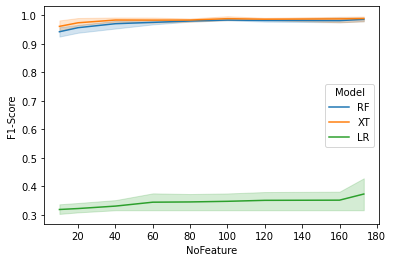

In [208]:
# Visualising F1-score for all the 3 models based on number of features
sns.lineplot(data = metrics, x = "NoFeature", y = "F1-Score", hue = 'Model')

<AxesSubplot:xlabel='NoFeature', ylabel='Precision'>

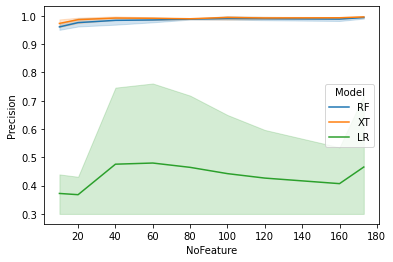

In [196]:
# Visualising Precision for all the 3 models based on number of features
sns.lineplot(data = metrics, x = "NoFeature", y = "Precision", hue = 'Model')

<AxesSubplot:xlabel='NoFeature', ylabel='Re-call'>

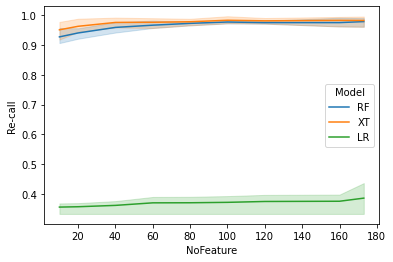

In [204]:
# Visualising Re-call for all the 3 models based on number of features
sns.lineplot(data = metrics, x = "NoFeature", y = 'Re-call', hue = 'Model')

In [321]:
# Comparing the metrics for 40 features
metrics.sort_values(by = ['Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
2,40,LR,HCH,0.275108,0.403929,0.347955
5,40,LR,HHH,0.314875,0.298354,0.333333
8,40,LR,CLH,0.342810,0.358334,0.365702
0,40,RF,HDL,0.959325,0.973912,0.947077
3,40,RF,HHH,0.967397,0.991555,0.945160
6,40,RF,CLH,0.953274,0.982848,0.929144
1,40,XT,HDL,0.994708,0.996140,0.993295
4,40,XT,HHH,0.967397,0.991555,0.945160
7,40,XT,CLH,0.953274,0.982848,0.929144


### 4) Treating imbalance using SMOTE

Oversampling minority class indiviually based on each of the target variable

In [337]:
# HCH
print('==================HCH==================')
X1_trainS, y1_trainS = overSampleData(train, labels_n, 0)

# HHH
print('==================HHH==================')
X2_trainS, y2_trainS = overSampleData(train, labels_n, 1)

# CLH
print('==================CLH==================')
X3_trainS, y3_trainS = overSampleData(train, labels_n, 2)

==================HCH==================
Samples per class before oversampling minority class:
Counter({1.0: 4900, 0.0: 2113, 2.0: 1681})
Samples per class after oversampling minority class:
Counter({0.0: 4900, 1.0: 4900, 2.0: 4900})
==================HHH==================
Samples per class before oversampling minority class:
Counter({1.0: 7765, 2.0: 558, 0.0: 371})
Samples per class after oversampling minority class:
Counter({1.0: 7765, 2.0: 7765, 0.0: 7765})
==================CLH==================
Samples per class before oversampling minority class:
Counter({1.0: 4716, 2.0: 3568, 0.0: 410})
Samples per class after oversampling minority class:
Counter({1.0: 4716, 2.0: 4716, 0.0: 4716})


Visualising the data after performing oversampling of minority classes

<AxesSubplot:xlabel='0', ylabel='count'>

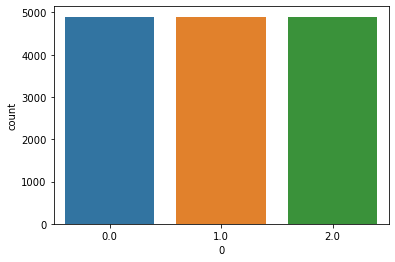

In [338]:
# HCH
y1_S = pd.DataFrame(y1_trainS)
sns.countplot(y1_S[0])

<AxesSubplot:xlabel='0', ylabel='count'>

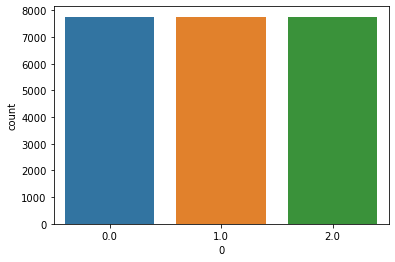

In [339]:
# HHH
y2_S = pd.DataFrame(y2_trainS)
sns.countplot(y2_S[0])

<AxesSubplot:xlabel='0', ylabel='count'>

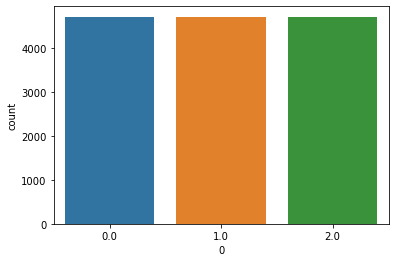

In [340]:
# CLH
y3_S = pd.DataFrame(y3_trainS)
sns.countplot(y3_S[0])

In [343]:
# Converting the label array in the expected format
t=list(y1_trainS)
y1_trainS=np.array([t,]*3).transpose()

t=list(y2_trainS)
y2_trainS=np.array([t,]*3).transpose()

t=list(y3_trainS)
y3_trainS=np.array([t,]*3).transpose()


In [351]:
#Testing for different number of features:

noFeatureL=[173, 40]

metrics=pd.DataFrame(columns=['NoFeature','Model', 'Target', 'F1-Score',
                              'Precision','Re-call'])

for nofeature in noFeatureL:
    
    print("================ No of Features: ",nofeature,"================")
    # Applying RFE on Hdl_cholesterol_human 
    print("Hdl_cholesterol_human:")
    uFeatures_HCH , uValidation_HCH, uTest_HCH = RFE_DimReduction(features, 
                                   labels_n, 0, nofeature, validation, 
                                   validationLabels_n, test)
    # Applying Random Forest on Hdl_cholesterol_human
    pl_HCH_RF, pl_HCHv_RF = RandomForestClassifierEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, y1_trainS, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RF, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Hdl_cholesterol_human
    pl_HCH_XT, pl_HCHv_XT = ExtraTreesClassifierEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, y1_trainS, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_XT, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Logistic Regression Classifier on Hdl_cholesterol_human
    pl_HCH_GB, pl_HCHv_GB = logisticRegressionEachTargetGS(uFeatures_HCH, 
                                   uValidation_HCH, uTest_HCH, 10, 
                                   validationLabels_n, y1_trainS, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_GB, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HDL', 'F1-Score': f1, 
    'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    # Applying RFE on Hemoglobin_hgb_human
    print("Hemoglobin_hgb_human:")
    uFeatures_HHH , uValidation_HHH, uTest_HHH = RFE_DimReduction(features, 
                                   labels_n, 1, nofeature, validation, 
                                   validationLabels_n, test)
    
    # Applying Random Forest on Hemoglobin_hgb_human
    pl_HHH_RF, pl_HHHv_RF = RandomForestClassifierEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 4, 
                                    validationLabels_n, y2_trainS, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_RF, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Hemoglobin_hgb_human
    pl_HHH_XT, pl_HHHv_XT = RandomForestClassifierEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 4, 
                                    validationLabels_n, y2_trainS, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_XT, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Gradient Boosting Classifier on Hemoglobin_hgb_human
    pl_HHH_GB, pl_HHHv_GB = logisticRegressionEachTargetGS(uFeatures_HHH, 
                                   uValidation_HHH, uTest_HHH, 4, 
                                   validationLabels_n, y2_trainS, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_GB, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HHH', 'F1-Score': f1, 
          'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    # Applying RFE on Cholesterol_ldl_human
    print("Cholesterol_ldl_human:")
    uFeatures_CLH , uValidation_CLH, uTest_CLH = RFE_DimReduction(features, 
                                   labels_n, 2, nofeature, validation, 
                                   validationLabels_n, test)
        
    # Applying Random Forest on Cholesterol_ldl_human
    pl_CLH_RF, pl_CLHv_RF=RandomForestClassifierEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH, 5, 
                                    validationLabels_n, y3_trainS, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_RF, 2)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Cholesterol_ldl_human
    pl_CLH_XT, pl_CLHv_XT=RandomForestClassifierEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH, 5, 
                                    validationLabels_n, y3_trainS, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_XT, 2)
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Gradient Boosting Classifier on Cholesterol_ldl_human
    pl_CLH_GB, pl_CLHv_GB=logisticRegressionEachTargetGS(uFeatures_CLH , 
                                   uValidation_CLH, uTest_CLH, 5, 
                                   validationLabels_n, y3_trainS, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_GB, 2)
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'CLH', 'F1-Score': f1, 
          'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    modelDir = 'outputFilesRF'
    GenerateOutputFile(pl_HCH_RF, pl_HHH_RF, pl_CLH_RF, 
                       nofeature,modelDir,'_RFf_STOME',idx)

    modelDir = 'ouputFilesXT'
    GenerateOutputFile(pl_HCH_XT, pl_HHH_XT, pl_CLH_XT, 
                       nofeature,modelDir,'_XTf_STOME',idx)
    
    modelDir = 'ouputFilesLR'
    GenerateOutputFile(pl_HCH_GB, pl_HHH_GB, pl_CLH_GB, 
                       nofeature,modelDir,'_LR_STOME',idx)
    
    file_name = 'Metrics/metricsDf_STOME_NewData'
    metrics.to_csv(file_name, sep=',')
    print("==================================================================")

========================= No of Features:  173 =============================
Hdl_cholesterol_human:
Best Estimator : RandomForestClassifier(max_depth=12, min_samples_split=10, n_estimators=16,
                       random_state=0)
Score:  0.9868491680085884
Best Estimator : ExtraTreesClassifier(n_estimators=15, random_state=0)
Score:  0.9981213097155126
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.44578636607622113
Hemoglobin_hgb_human:
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=16, random_state=0)
Score:  0.9997316156736447
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=16, random_state=0)
Score:  0.9997316156736447
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.3969404186795491
Cholesterol_ldl_human:

In [357]:
# Comparing metrics for sampled data
metrics.sort_values(by=['NoFeature', 'Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
11,40,LR,HDL,0.434700,0.442451,0.473833
14,40,LR,HHH,0.299333,0.393409,0.571023
17,40,LR,CLH,0.357383,0.406345,0.474014
9,40,RF,HDL,0.985410,0.986795,0.984074
12,40,RF,HHH,0.999198,0.999900,0.998498
15,40,RF,CLH,0.992576,0.994376,0.990800
10,40,XT,HDL,0.998889,0.999372,0.998409
13,40,XT,HHH,0.999198,0.999900,0.998498
16,40,XT,CLH,0.992576,0.994376,0.990800
2,173,LR,HDL,0.434700,0.442451,0.473833


## 5) Applying PCA and Random Forest Multi Output Classifier

In [59]:
noFeatureL=[172, 170, 160, 140, 120, 100, 80, 60, 40, 20, 10, 5]
metrics=pd.DataFrame(columns=['NoFeature','Model', 'Target', 'F1-Score',
                              'Precision','Re-call'])

for nofeature in noFeatureL:
    print("================ No of Features: ",nofeature,"================")
    updatedFeatures , updatedValidation, updatedTest = ApplyPCA(features, 
                                    labels_n, nofeature, validation, 
                                    validationLabels_n, test, nofeature)
    predicted_labels_PCA, plv = RFMultiOutputClassifier(updatedFeatures, 
                                    labels_n, updatedValidation,
                                    validationLabels_n,updatedTest)

    
    f1, pre, re = evaluateValidation(validationLabels_n, plv[:,0], 0)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HCH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    f1, pre, re=evaluateValidation(validationLabels_n, plv[:,1], 1)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
  

    f1, pre, re=evaluateValidation(validationLabels_n, plv[:,2], 2)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
  
    file_name = 'Metrics/metricsNew_PCA_SAMPLEDstd'
    metrics.to_csv(file_name, sep = ',')
    
    modelDir = 'PCA'
    GenerateOutputFile(predicted_labels_PCA[:,0],
                       predicted_labels_PCA[:,1],predicted_labels_PCA[:,2], 
                       nofeature,modelDir,'_PCA',idx)  
    print("================================================================")

========================= No of Features:  172 =============================
Dimenssion of feature array after applying PCA:  (8694, 172)
Dimenssion of validation array after applying PCA:  (3726, 172)
Dimenssion of test array after applying PCA:  (3660, 172)
Validation Score:  0.7176596886741814
/Users/apoorvamalemath/Documents/MS/SML/Project/BloodSpectrocopy/Final_files/PCA/out_F172_PCA.csv
========================= No of Features:  170 =============================
Dimenssion of feature array after applying PCA:  (8694, 170)
Dimenssion of validation array after applying PCA:  (3726, 170)
Dimenssion of test array after applying PCA:  (3660, 170)
Validation Score:  0.7270531400966184
/Users/apoorvamalemath/Documents/MS/SML/Project/BloodSpectrocopy/Final_files/PCA/out_F170_PCA.csv
========================= No of Features:  160 =============================
Dimenssion of feature array after applying PCA:  (8694, 160)
Dimenssion of validation array after applying PCA:  (3726, 160)
Dimens

<AxesSubplot:xlabel='NoFeature', ylabel='F1-Score'>

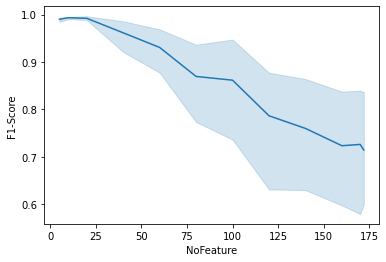

In [62]:
# Visualising F1-score based on number of features
sns.lineplot(data=metrics, x="NoFeature", y="F1-Score")

<AxesSubplot:xlabel='NoFeature', ylabel='Precision'>

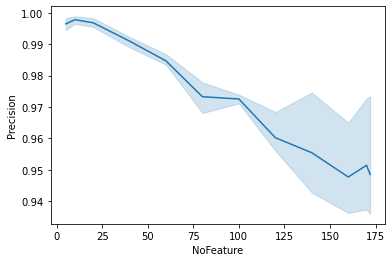

In [63]:
# Visualising Precision based on number of features
sns.lineplot(data=metrics, x="NoFeature", y="Precision")

<AxesSubplot:xlabel='NoFeature', ylabel='Re-call'>

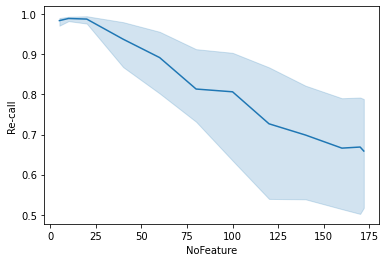

In [64]:
# Visualising Re-call based on number of features
sns.lineplot(data=metrics, x="NoFeature", y="Re-call")

## 6)  Applying Random Forest Classifier, Extra Tree Classifier and Logistic Regression for different number of features using PCA

In [213]:
noFeatureL=[172, 170, 160, 140, 120, 100, 80, 60, 40, 20, 10, 5]
metrics=pd.DataFrame(columns=['NoFeature','Model', 'Target', 'F1-Score',
                              'Precision','Re-call'])

for nofeature in noFeatureL:
    print("============= No of Features: ",nofeature,"====================")
    updatedFeatures , updatedValidation, updatedTest = ApplyPCA(features, 
                                    labels_n, nofeature, validation, 
                                    validationLabels_n, test, nofeature)

    # Applying Random Forest on Hdl_cholesterol_human
    pl_HCH_RF, pl_HCHv_RF = RandomForestClassifierEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RF, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Hdl_cholesterol_human
    pl_HCH_XT, pl_HCHv_XT = ExtraTreesClassifierEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_XT, 0)
     
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 

    # Applying Logistic Regression on Hdl_cholesterol_human
    pl_HCH_LR, pl_HCHv_LR = logisticRegressionEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_LR, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HCH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    # Applying RFE on Hemoglobin_hgb_human
    print("Hemoglobin_hgb_human:")
    
    # Applying Random Forest on Hemoglobin_hgb_human
    pl_HHH_RF, pl_HHHv_RF = RandomForestClassifierEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_RF, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Hemoglobin_hgb_human
    pl_HHH_XT, pl_HHHv_XT = RandomForestClassifierEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_XT, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    pl_HHH_LR, pl_HHHv_LR = logisticRegressionEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 10, 
                                    validationLabels_n, labels_n, 1,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_LR, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    # Applying RFE on Cholesterol_ldl_human
    print("Cholesterol_ldl_human:")
        
    # Applying Random Forest on Cholesterol_ldl_human
    pl_CLH_RF, pl_CLHv_RF = RandomForestClassifierEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_RF, 2)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Cholesterol_ldl_human
    pl_CLH_XT, pl_CLHv_XT = RandomForestClassifierEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re=evaluateValidation(validationLabels_n, pl_CLHv_XT, 2)
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    

    pl_CLH_LR, pl_CLHv_LR = logisticRegressionEachTargetGS(updatedFeatures, 
                                    updatedValidation, updatedTest, 10, 
                                    validationLabels_n, labels_n, 2,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_LR, 2)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    modelDir = 'outputFilesRF'
    GenerateOutputFile(pl_HCH_RF, pl_HHH_RF, pl_CLH_RF, 
                       nofeature,modelDir,'_RF_PCA',idx)

    modelDir = 'ouputFilesXT'
    GenerateOutputFile(pl_HCH_XT, pl_HHH_XT, pl_CLH_XT, 
                       nofeature,modelDir,'_XT_PCA',idx)

    modelDir = 'ouputFilesLR'
    GenerateOutputFile(pl_HCH_LR, pl_HHH_LR, pl_CLH_LR, 
                       nofeature,modelDir,'_LR_PCA',idx)
    
    file_name = 'Metrics/metricsNew_PCA'
    metrics.to_csv(file_name, sep = ',')
    print("==================================================================")

============= No of Features:  172 ====================
Dimenssion of feature array after applying PCA:  (9156, 172)
Dimenssion of validation array after applying PCA:  (3924, 172)
Dimenssion of test array after applying PCA:  (3660, 172)
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=20,
                       n_estimators=16, random_state=0)
Score:  0.7849133537206932
Best Estimator : ExtraTreesClassifier(n_estimators=30, random_state=0)
Score:  0.7196738022426096
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.5677879714576962
Hemoglobin_hgb_human:
Best Estimator : RandomForestClassifier(max_depth=12, min_samples_split=15, n_estimators=16,
                       random_state=0)
Score:  0.9029051987767585
Best Estimator : RandomForestClassifier(max_depth=12, min_samples_split=15, n_estimators=16,
                       random_state=0)
Score:  0.9029051987767585
<bound method BaseEstim

In [214]:
metrics.sort_values(by=['NoFeature', 'Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
101,5,LR,HCH,0.250041,0.324054,0.337067
104,5,LR,HHH,0.312771,0.294597,0.333333
107,5,LR,CLH,0.338083,0.349181,0.356894
99,5,RF,HDL,0.938875,0.950545,0.928802
102,5,RF,HHH,0.934840,0.989320,0.889727
...,...,...,...,...,...,...
3,172,RF,HHH,0.514711,0.967004,0.455136
6,172,RF,CLH,0.694573,0.899081,0.643378
1,172,XT,HDL,0.612861,0.867303,0.572605
4,172,XT,HHH,0.514711,0.967004,0.455136


<AxesSubplot:xlabel='NoFeature', ylabel='F1-Score'>

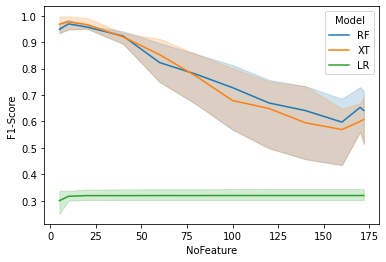

In [216]:
# Visualising F1-score based on number of features using catboost
sns.lineplot(data=metrics, x="NoFeature", y="F1-Score", hue="Model")

<AxesSubplot:xlabel='NoFeature', ylabel='Precision'>

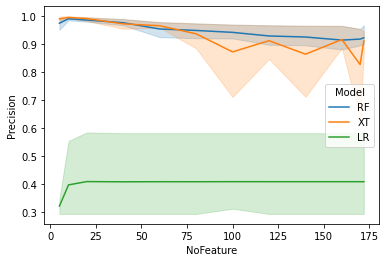

In [217]:
# Visualising Precision based on number of features using catboost
sns.lineplot(data=metrics, x="NoFeature", y="Precision", hue="Model")

<AxesSubplot:xlabel='NoFeature', ylabel='Re-call'>

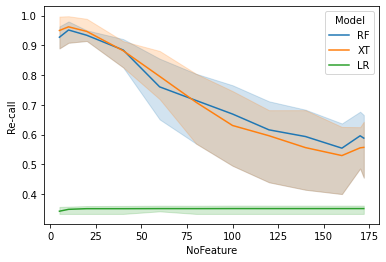

In [218]:
# Visualising Precision based on number of features using catboost
sns.lineplot(data=metrics, x="NoFeature", y="Re-call", hue="Model")

## 7) Applying Random Forest Classifier, Extra Tree Classifier and Logistic Regression for different number of features using RFE on Normalised Data

In [79]:
from sklearn import preprocessing

# normalize the data attributes
normalizedFeatures = preprocessing.normalize(features)
normalizedValidation = preprocessing.normalize(validation)
normalizedtest = preprocessing.normalize(test)

In [82]:
noFeatureL=[173, 40]
noEst=200

metrics=pd.DataFrame(columns=['NoFeature','Model', 'Target', 'F1-Score',
                              'Precision','Re-call'])

for nofeature in noFeatureL:
    
    print("================  No of Features: ",nofeature,"================")
    print("Hdl_cholesterol_human:")
    # Applying Random Forest on Hdl_cholesterol_human
    pl_HCH_RF, pl_HCHv_RF = RandomForestClassifierEachTargetGS(normalizedFeatures, 
                                    normalizedValidation, normalizedtest, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RF, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Extra Tree Classifier on Hdl_cholesterol_human
    pl_HCH_XT, pl_HCHv_XT = ExtraTreesClassifierEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1,pre,re = evaluateValidation(validationLabels_n, pl_HCHv_XT, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Logistic Regression on Hdl_cholesterol_human
    pl_HCH_LR, pl_HCHv_LR = logisticRegressionEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_LR, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HCH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    print("Hemoglobin_hgb_human:")
    
    # Applying Random Forest on Hemoglobin_hgb_human
    pl_HHH_RF, pl_HHHv_RF = RandomForestClassifierEachTargetGS(normalizedFeatures, 
                                    normalizedValidation, normalizedtest, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_RF, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Hemoglobin_hgb_human
    pl_HHH_XT, pl_HHHv_XT = RandomForestClassifierEachTargetGS(features, 
                                    validation, test, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_XT, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    

    # Applying Logistic Regression on Hemoglobin_hgb_human
    pl_HHH_LR, pl_HHHv_LR=logisticRegressionEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 1,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_LR, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    print("Cholesterol_ldl_human:")
        
    # Applying Random Forest on Cholesterol_ldl_human
    pl_CLH_RF, pl_CLHv_RF = RandomForestClassifierEachTargetGS(normalizedFeatures, 
                                    normalizedValidation, normalizedtest, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_RF, 2)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    # Applying Extra Tree Classifier on Cholesterol_ldl_human
    pl_CLH_XT, pl_CLHv_XT=RandomForestClassifierEachTargetGS(features, 
                                    validation, test, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1,pre,re=evaluateValidation(validationLabels_n,pl_CLHv_XT,2)
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    

    # Applying Logistic Regression on Cholesterol_ldl_human
    pl_CLH_LR, pl_CLHv_LR = logisticRegressionEachTargetGS(features, 
                                    validation, test, 10, 
                                    validationLabels_n, labels_n, 2,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_LR, 2)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    modelDir='outputFilesRF'
    GenerateOutputFile(pl_HCH_RF, pl_HHH_RF, pl_CLH_RF, 
                       nofeature,modelDir,'_RF_Norm',idx)

    modelDir='ouputFilesXT'
    GenerateOutputFile(pl_HCH_XT, pl_HHH_XT, pl_CLH_XT, 
                       nofeature,modelDir,'_XT_Norm',idx)
    
    modelDir='ouputFilesLR'
    GenerateOutputFile(pl_HCH_LR, pl_HHH_LR, pl_CLH_LR, 
                       nofeature,modelDir,'_LR_Norm',idx)
    
    file_name='Metrics/metricsNEW_Complete_Norm'
    metrics.to_csv(file_name, sep=',')
    print("=====================================================================================")

========================= No of Features:  173 =============================
Hdl_cholesterol_human:
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=15,
                       n_estimators=16, random_state=0)
Score:  0.9562533548040795
Best Estimator : ExtraTreesClassifier(n_estimators=14, random_state=0)
Score:  0.9975845410628019
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.5687063875469672
Hemoglobin_hgb_human:
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=16,
                       random_state=0)
Score:  0.990606548577563
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=16, random_state=0)
Score:  0.9967793880837359
<bound method BaseEstimator.get_params of LogisticRegression(random_state=0, solver='saga')>
Score:  0.8950617283950617
Cholesterol_ldl_human:
B

In [83]:
# Visualising metrics for Normalised data for each of the models 
metrics.sort_values(by=['NoFeature', 'Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
11,40,LR,HCH,0.261893,0.346401,0.339733
14,40,LR,HHH,0.314875,0.298354,0.333333
17,40,LR,CLH,0.359820,0.368001,0.376554
9,40,RF,HDL,0.948548,0.970652,0.930879
12,40,RF,HHH,0.967275,0.992021,0.944589
15,40,RF,CLH,0.974675,0.985214,0.964881
10,40,XT,HDL,0.991599,0.993936,0.989366
13,40,XT,HHH,0.988556,0.998805,0.978686
16,40,XT,CLH,0.988353,0.993222,0.983654
2,173,LR,HCH,0.261893,0.346401,0.339733


## 8) Applying CatBoost for different number of features using RFE

In [158]:
noFeatureL = [45, 40, 35, 30, 20, 10]
metrics = pd.DataFrame(columns = ['NoFeature','Model', 'Target', 'F1-Score',
                                  'Precision','Re-call'])

for nofeature in noFeatureL:
    
    print("============== No of Features: ",nofeature,"==============")
    #Applying RFE on Hdl_cholesterol_human 
    print("Hdl_cholesterol_human:")
    uFeatures_HCH , uValidation_HCH, uTest_HCH = RFE_DimReduction(features, 
                                   labels_n, 0, nofeature, validation, 
                                   validationLabels_n, test)
    #Applying catboost on Hdl_cholesterol_human
    pl_HCH_RF, pl_HCHv_RF = CatBoostEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RF, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'CB','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    #Applying RFE on Hemoglobin_hgb_human
    print("Hemoglobin_hgb_human:")
    uFeatures_HHH , uValidation_HHH, uTest_HHH = RFE_DimReduction(features, 
                                   labels_n, 1, nofeature, validation, 
                                   validationLabels_n, test)
    
    #Applying catboost on Hemoglobin_hgb_human
    pl_HHH_RF, pl_HHHv_RF = CatBoostEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_RF, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'CB','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    ############################################################################
    
    #Applying RFE on Cholesterol_ldl_human
    print("Cholesterol_ldl_human:")
    uFeatures_CLH , uValidation_CLH, uTest_CLH = RFE_DimReduction(features, 
                                   labels_n, 2, nofeature, validation, 
                                   validationLabels_n, test)
        
    #Applying catboost on Cholesterol_ldl_human
    pl_CLH_RF, pl_CLHv_RF = CatBoostEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_RF, 2)
    
    row = {'NoFeature': nofeature, 'Model': 'CB','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    file_name = 'Metrics/metricsDf_sampled_CAT'
    metrics.to_csv(file_name, sep = ',')
    
    modelDir = 'outputFilesCB'
    GenerateOutputFile(pl_HCH_GB, pl_HHH_GB, pl_CLH_GB, 
                       nofeature,modelDir,'_CAT',idx)

========================= No of Features:  45 =============================
Hdl_cholesterol_human:
Feature Indexes to be dropped: 
[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 24, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 58, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 100, 103, 104, 105, 107, 110, 111, 112, 113, 114, 116, 117, 119, 122, 125, 126, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172]
Train Data:  (4638, 45)
Validation Data:  (1988, 45)
Test Data:  (3660, 45)
0:	learn: 1.0483977	total: 20.5ms	remaining: 20.5s
1:	learn: 1.0090626	total: 33ms	remaining: 16.5s
2:	learn: 0.9747452	total: 44.8ms	remaining: 14.9s
3:	learn: 0.9399954	total: 57.3ms	remaining: 14.3s
4:	learn: 0.9049944	total: 69.

In [159]:
# Comparing the metrics for Different number of features
metrics.sort_values(by=['NoFeature', 'Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
15,10,CB,HDL,0.971056,0.978803,0.963946
16,10,CB,HHH,0.967176,0.987546,0.948510
17,10,CB,CLH,0.973892,0.986699,0.962226
12,20,CB,HDL,0.988930,0.991341,0.986578
13,20,CB,HHH,0.984758,0.993713,0.976121
14,20,CB,CLH,0.980176,0.993411,0.968103
9,30,CB,HDL,0.985931,0.990047,0.981987
10,30,CB,HHH,0.985771,0.993673,0.978081
11,30,CB,CLH,0.981664,0.991645,0.972342
6,35,CB,HDL,0.987360,0.990639,0.984212


<AxesSubplot:xlabel='NoFeature', ylabel='F1-Score'>

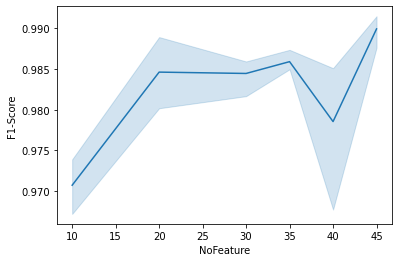

In [163]:
# Visualising F1-score based on number of features using catboost
sns.lineplot(data=metrics, x="NoFeature", y="F1-Score")

<AxesSubplot:xlabel='NoFeature', ylabel='Precision'>

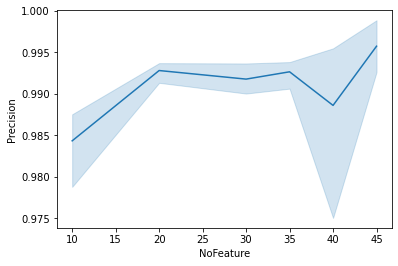

In [165]:
# Visualising Precision based on number of features using catboost
sns.lineplot(data=metrics, x="NoFeature", y="Precision")

<AxesSubplot:xlabel='NoFeature', ylabel='Re-call'>

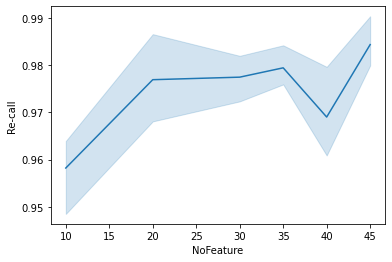

In [170]:
# Visualising Re-call based on number of features using catboost
sns.lineplot(data=metrics, x="NoFeature", y="Re-call")

## 9) Applying all models for 40 features using RFE

In [26]:

noFeatureL = [40]
noEst = 200

metrics = pd.DataFrame(columns = ['NoFeature','Model', 'Target', 'F1-Score',
                              'Precision','Re-call'])

for nofeature in noFeatureL:
    
    print("============== No of Features: ",nofeature,"==================")
    #Applying RFE on Hdl_cholesterol_human 
    print("Hdl_cholesterol_human:")
    uFeatures_HCH , uValidation_HCH, uTest_HCH = RFE_DimReduction(features, 
                                   labels_n, 0, nofeature, validation, 
                                   validationLabels_n, test)
    #Applying Random Forest on Hdl_cholesterol_human
    pl_HCH_RF, pl_HCHv_RF = RandomForestClassifierEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RF, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Extra Tree Classifier on Hdl_cholesterol_human
    pl_HCH_XT, pl_HCHv_XT = ExtraTreesClassifierEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 10, 
                                    validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_XT, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Logistic Regression Classifier on Hdl_cholesterol_human
    pl_HCH_GB, pl_HCHv_GB = logisticRegressionEachTargetGS(uFeatures_HCH, 
                                   uValidation_HCH, uTest_HCH, 10, 
                                   validationLabels_n, labels_n, 0,noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_GB, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HDL', 'F1-Score': f1, 
    'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 

    #Applying Radius Neighbor Classifier on Hdl_cholesterol_human
    pl_HCH_RNC, pl_HCHv_RNC = RadiusNeighborsClassifierEachTargetGS(uFeatures_HCH, 
                                    uValidation_HCH, uTest_HCH, 
                                    validationLabels_n, labels_n, 0)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HCHv_RNC, 0)
    
    row = {'NoFeature': nofeature, 'Model': 'RNC','Target':'HDL', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    ############################################################################
    
    #Applying RFE on Hemoglobin_hgb_human
    print("Hemoglobin_hgb_human:")
    uFeatures_HHH , uValidation_HHH, uTest_HHH = RFE_DimReduction(features, 
                                   labels_n, 1, nofeature, validation, 
                                   validationLabels_n, test)
    
    #Applying Random Forest on Hemoglobin_hgb_human
    pl_HHH_RF, pl_HHHv_RF = RandomForestClassifierEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1,pre,re = evaluateValidation(validationLabels_n,pl_HHHv_RF,1)
    
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Extra Tree Classifier on Hemoglobin_hgb_human
    pl_HHH_XT, pl_HHHv_XT = RandomForestClassifierEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 4, 
                                    validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_XT, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Gradient Boosting Classifier on Hemoglobin_hgb_human
    pl_HHH_GB, pl_HHHv_GB = logisticRegressionEachTargetGS(uFeatures_HHH, 
                                   uValidation_HHH, uTest_HHH, 4, 
                                   validationLabels_n, labels_n, 1, noEst)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_GB, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'HHH', 'F1-Score': f1, 
          'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 

    #Applying Radius Neighbor Classifier on Hemoglobin_hgb_human
    pl_HHH_RNC, pl_HHHv_RNC =RadiusNeighborsClassifierEachTargetGS(uFeatures_HHH, 
                                    uValidation_HHH, uTest_HHH, 
                                    validationLabels_n, labels_n, 1)
    f1, pre, re = evaluateValidation(validationLabels_n, pl_HHHv_RNC, 1)
    
    row = {'NoFeature': nofeature, 'Model': 'RNC','Target':'HHH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True)
    
    ############################################################################
    
    #Applying RFE on Cholesterol_ldl_human
    print("Cholesterol_ldl_human:")
    uFeatures_CLH , uValidation_CLH, uTest_CLH = RFE_DimReduction(features, 
                                   labels_n, 2, nofeature, validation, 
                                   validationLabels_n, test)
        
    #Applying Random Forest on Cholesterol_ldl_human
    pl_CLH_RF, pl_CLHv_RF=RandomForestClassifierEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_RF, 2)
    row = {'NoFeature': nofeature, 'Model': 'RF','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Extra Tree Classifier on Cholesterol_ldl_human
    pl_CLH_XT, pl_CLHv_XT = RandomForestClassifierEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH, 5, 
                                    validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_XT, 2)
    row = {'NoFeature': nofeature, 'Model': 'XT','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 
    
    #Applying Gradient Boosting Classifier on Cholesterol_ldl_human
    pl_CLH_GB, pl_CLHv_GB=logisticRegressionEachTargetGS(uFeatures_CLH , 
                                   uValidation_CLH, uTest_CLH, 5, 
                                   validationLabels_n, labels_n, 2, noEst)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_GB, 2)
    row = {'NoFeature': nofeature, 'Model': 'LR','Target':'CLH', 'F1-Score': f1, 
          'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True) 

    #Applying Radius Neighbor Classifier on Cholesterol_ldl_human
    pl_CLH_RNC, pl_CLHv_RNC=RadiusNeighborsClassifierEachTargetGS(uFeatures_CLH, 
                                    uValidation_CLH, uTest_CLH,
                                    validationLabels_n, labels_n, 2)
    
    f1, pre, re = evaluateValidation(validationLabels_n, pl_CLHv_RNC, 2)
    row = {'NoFeature': nofeature, 'Model': 'RNC','Target':'CLH', 'F1-Score': f1, 
           'Precision': pre, 'Re-call':re}
    metrics = metrics.append(row, ignore_index = True)
    
    ############################################################################
    
    modelDir='outputFilesRF'
    GenerateOutputFile(pl_HCH_RF, pl_HHH_RF, pl_CLH_RF, 
                       nofeature,modelDir,'_RFf_STOME',idx)

    modelDir='ouputFilesXT'
    GenerateOutputFile(pl_HCH_XT, pl_HHH_XT, pl_CLH_XT, 
                       nofeature,modelDir,'_XTf_STOME',idx)
    
    modelDir='ouputFilesLR'
    GenerateOutputFile(pl_HCH_GB, pl_HHH_GB, pl_CLH_GB, 
                       nofeature,modelDir,'_LR_STOME',idx)
    
    modelDir='ouputFilesRNC'
    GenerateOutputFile(pl_HCH_RNC, pl_HHH_RNC, pl_CLH_RNC, 
                       nofeature,modelDir,'_RNC_STOME',idx)
    
    file_name='Metrics/metricsDf_10'
    metrics.to_csv(file_name, sep=',')
    print("===================================================================")

============== No of Features:  40 ==================
Hdl_cholesterol_human:
Feature Indexes to be dropped: 
[0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 49, 51, 52, 53, 54, 55, 56, 57, 61, 63, 64, 65, 66, 67, 68, 70, 74, 75, 76, 80, 81, 82, 83, 87, 88, 89, 92, 93, 100, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172]
Train Data:  (8694, 40)
Validation Data:  (3726, 40)
Test Data:  (3660, 40)
Best Estimator : RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=16,
                       random_state=0)
Score:  0.9629629629629629
Best Estimator : ExtraTreesClassifier(n_estimators=14, random_state

In [28]:
# Viewing the results
metrics.sort_values(by=['NoFeature', 'Model'])

,NoFeature,Model,Target,F1-Score,Precision,Re-call
2,40,LR,HDL,0.275108,0.403929,0.347955
6,40,LR,HHH,0.314875,0.298354,0.333333
10,40,LR,CLH,0.338228,0.350956,0.360758
0,40,RF,HDL,0.959325,0.973912,0.947077
4,40,RF,HHH,0.967397,0.991555,0.945160
8,40,RF,CLH,0.953274,0.982848,0.929144
3,40,RNC,HDL,0.241761,0.189658,0.333333
7,40,RNC,HHH,0.314875,0.298354,0.333333
11,40,RNC,CLH,0.237651,0.184648,0.333333
1,40,XT,HDL,0.994708,0.996140,0.993295
